## 데이터 전처리 (Data Preprocessing)
- ML의 모든 알고리즘은 데이터 기반, 따라서 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.
> Garbage In, Garbage Out
- Null 값은 어떻게 처리할 것인가?
- - 단순히 평균값 대체? 해당 피처의 중요도가 높다면 피처의 평균으로 대체할 경우 왜곡이 심할 수 있음. 따라서 업무 로직 등을 상세히 검토해 더 정밀한 대체값을 선정
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음, 따라서 문자형 값은 인코딩돼서 숫자형으로 변환해야함
- - 불필요한 피처라고 생각되면 삭제하는 것이 더 좋음

##  데이터 인코딩

### 레이블 인코딩(Label encoding)
- 카테고리 피처를 코드형 숫자 값으로 변환 ex) 상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터 등 TV : 1, 냉장고 : 2, 전자레인지 : 3, 컴퓨터 : 4

### 원-핫 인코딩(One Hot encoding)
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식

In [1]:
# 레이블 인코딩 예시
from sklearn.preprocessing import LabelEncoder

items = ["TV","냉장고","전자레인지","노트북","선풍기","선풍기","믹서기","믹서기"]

# labelEncoder를 객체로 생성한 후, fit()와 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값:", labels)

인코딩 변환값: [0 1 5 2 4 4 3 3]


In [2]:
# 데이터가 많은 경우
print("인코딩 클래스:", encoder.classes_)
# 0부터 순서대로 인코딩 값에 대한 원본을 가지고 있음

인코딩 클래스: ['TV' '냉장고' '노트북' '믹서기' '선풍기' '전자레인지']


In [3]:
# 다시 디코딩 하는 법
print("디코딩 원본값:", encoder.inverse_transform([4,5,2,0,1,1,3,3,2,4,4,4,4,4,4]))

디코딩 원본값: ['선풍기' '전자레인지' '노트북' 'TV' '냉장고' '냉장고' '믹서기' '믹서기' '노트북' '선풍기' '선풍기' '선풍기'
 '선풍기' '선풍기' '선풍기']


In [4]:
from IPython.display import Image

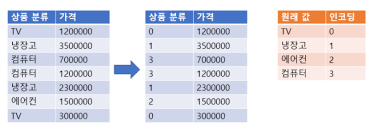

In [5]:
Image("레이블인코딩예시.png")

### 주의할 점
- 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환
- 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 때 예측 성능이 떨어지는 경우 발생
- 1과 2의 차이가 정말 차이가 있는 게 맞는 것인가?
- 숫자 값에 따른 순서나 중요도로 인식이 될 수 있음, 이런 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML 알고리즘은 숫자의 이런 특성을 반영하지 않으므로 레이블 인코딩 문제 없음

### 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식

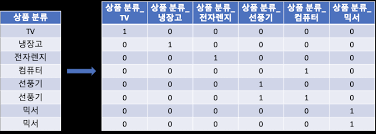

In [6]:
# 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식
Image("원-핫인코딩예시.png")

- 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시)

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","믹서기","믹서기"]

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print()
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원-핫 인코딩 데이터 차원
(8, 6)


- 컬럼이 items = ["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","믹서기","믹서기"]로 매칭
- 변환된 데이터의 첫 번째 레코드의 첫 번째 컬럼이 1이고 나머지는 모두 0

In [8]:
import pandas as pd

In [9]:
df_1 = pd.DataFrame({"이름":["홍길동","김영희","김철수","박철수","오철수","정철수","정철수","배철수"]})

In [10]:
df_1

,이름
0,홍길동
1,김영희
2,김철수
3,박철수
4,오철수
5,정철수
6,정철수
7,배철수


In [11]:
pd.get_dummies(df_1)

,이름_김영희,이름_김철수,이름_박철수,이름_배철수,이름_오철수,이름_정철수,이름_홍길동
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0


In [14]:
titanic_df = pd.read_csv("train.csv")

In [16]:
titanic_df["Embarked"].value_counts()
pd.get_dummies(titanic_df["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [17]:
tt_ot = pd.get_dummies(titanic_df["Embarked"])

In [18]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
pd.concat([titanic_df, tt_ot], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [20]:
tt_ot

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [21]:
pd.get_dummies(titanic_df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# 판다스에서 지원하는 API
# get_dummies
import pandas as pd

df = pd.DataFrame({"item":["TV","냉장고","전자레인지","컴퓨터","선풍기","선풍기","믹서기","믹서기"]})

pd.get_dummies(df) # 원-핫 인코딩!

,item_TV,item_냉장고,item_믹서기,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케이링과 정규화
### 피처 스케일링(feature scaling)
#### 표준화(Standardization), 정규화(Normalization)
- 표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 새로운 x의 값은 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산

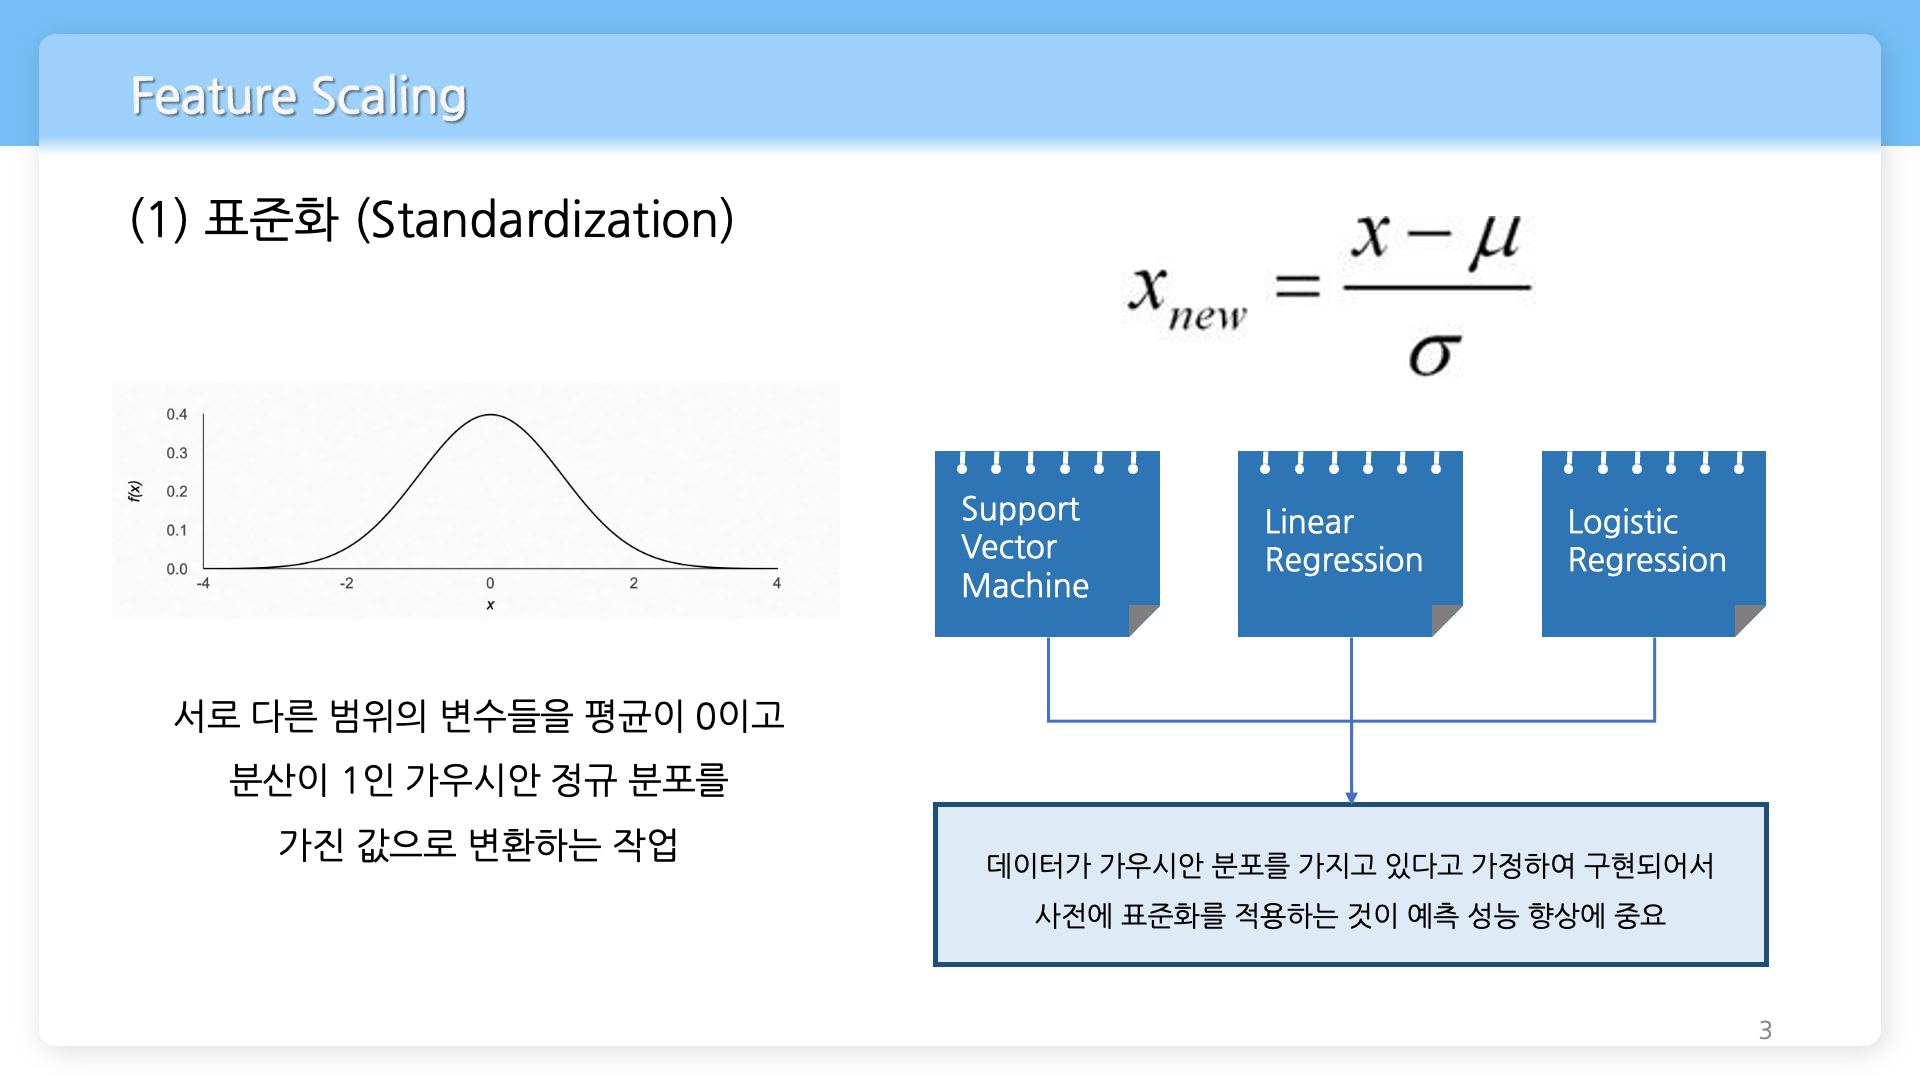

In [23]:
Image("표준화예시사진.png")

- 일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
- A는 거리를 나타내는 변수 값 0 ~ 100, B는 금액을 나타내는 속성 0 ~ 1,000,000,000,000이면 두 변수를 동일한 크기 단위로 비교하기 위해 0 ~ 1 사이로 변환

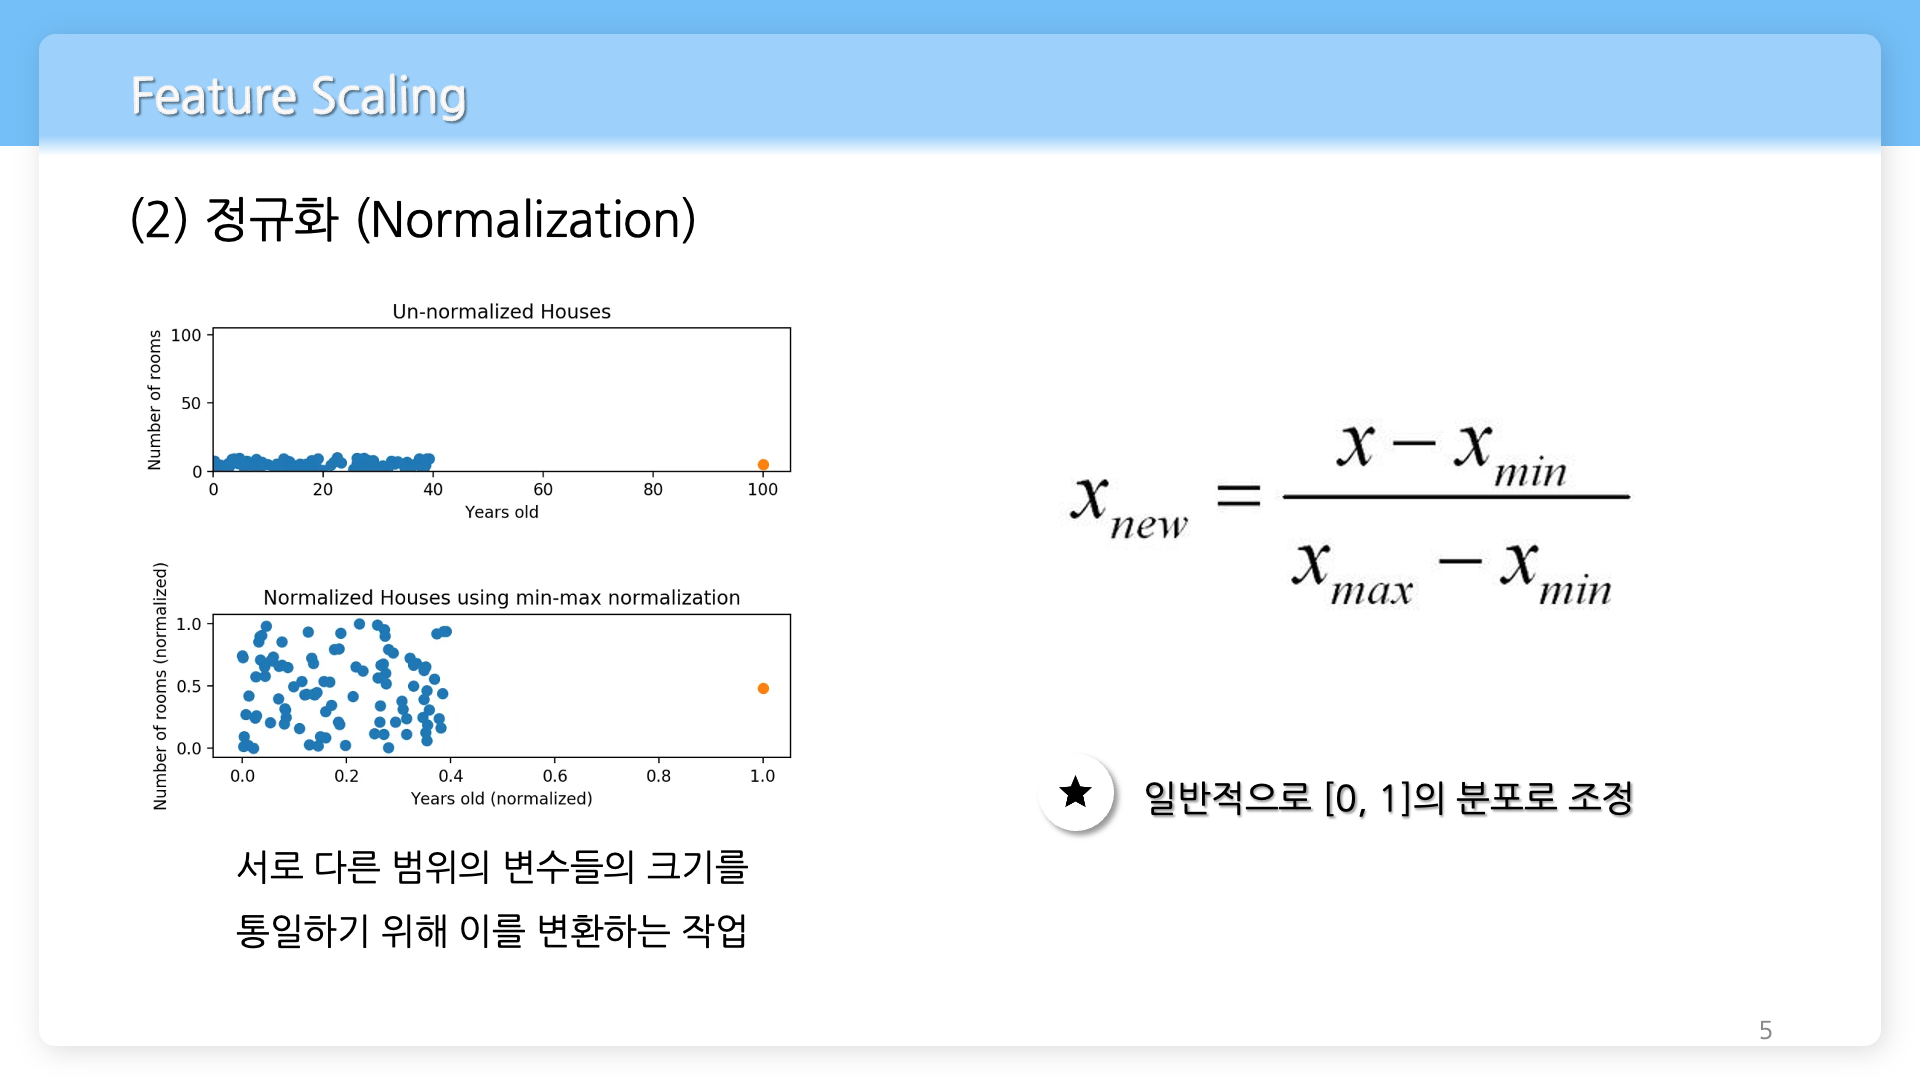

In [24]:
Image("정규화예시사진.png")

<div class="alert alert=block" style="border:2px solid #E65100;background-color:#FFF3E0;padding:10px">

#사이킷런 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
- 사이킷런의 Normalizer 모듈은은 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환 의미
- 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눔, 세 개의 피처 x, y, z가 있으면 새로운 데이터 x_i_new는 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠줌 (정규 벡터화)

</div>

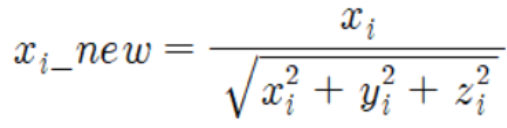

In [25]:
Image("벡터정규화예시사진.png")

### StandardScaler
- 표준화를 쉽게 지원하기 위한 클래스
- 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것
- 사이킷런 RBF 커널 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포 가정, 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [26]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature들의 평균 값")
print(iris_df.mean())
print()
print("feature들의 분산 값")
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [27]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- StandardScaler 객체를 생성 후에 fit()와 transform() 매서드에 변환 대상 피처 데이터 셋을 입력하고 호출하면 간단하게 변환
- transform()을 호출할 때 스케일 변환된 데이터 셋이 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값 분산값 다시 확인!

In [29]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 셋 변환, fit()와 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변화된 데이터 셋이 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 평균값")
print(iris_df_scaled.mean())
print()
print("feature들의 분산값")
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


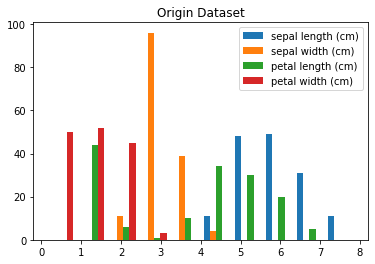

In [30]:
iris_df_standarded = (iris_df - iris_df.mean())/iris_df.std()

plt.title("Origin Dataset")
plt.hist(iris_df)
plt.legend(iris_df.columns)

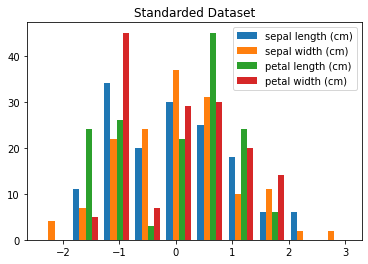

In [31]:
plt.title("Standarded Dataset")
plt.hist(iris_df_standarded)
plt.legend(iris_df_standarded.columns)

- 모든 컬럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환

### MinMaxScaler
- 데이터 값을 0과 1 사이의 범위 값으로 변환 (음수 값이면 -1에서 1 값으로 변환)
- 데이터 분포가 가우시안 분포가 아닌 경우에 Min Max Scale을 적용
- 분류보다 회귀에 유용합니다.

In [32]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 셋 변환, fit()와 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 셋이 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최솟값")
print(iris_df_scaled.min())
print()
print("feature들의 최댓값")
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


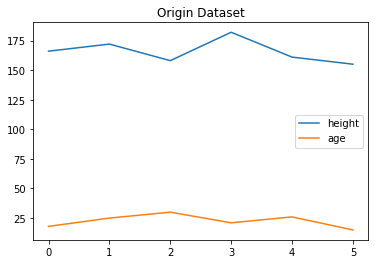

In [33]:
df = pd.DataFrame([[166, 18], 
                   [172, 25], 
                   [158, 30], 
                   [182, 21], 
                   [161, 26], 
                   [155, 15]])
df.columns = ["height", "age"]
df_new = (df - df.min())/(df.max() - df.min())

# 시각화
plt.title("Origin Dataset")
plt.plot(df)
plt.legend(df.columns)

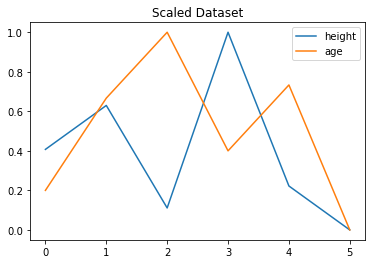

In [34]:
plt.title("Scaled Dataset")
plt.plot(df_new)
plt.legend(df_new.columns)

- 모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링 적용

### MaxAbsScaler()
- 각 특성의 절댓값이 0과 1 사이가 되도록 스케일링합니다.
- 즉, 모든 값은 -1와 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.
- 이상치에 매우 민감합니다.

In [35]:
from sklearn.preprocessing import MaxAbsScaler

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련 데이터의 모수 분포 저장
maxabs_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = maxabs_scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 셋이 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최솟값")
print(iris_df_scaled.min())
print()
print("feature들의 최댓값")
print(iris_df_scaled.max())

# 테스트 데이터의 스케일링
# X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링된 결과값으로 본래값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)    0.544304
sepal width (cm)     0.454545
petal length (cm)    0.144928
petal width (cm)     0.040000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


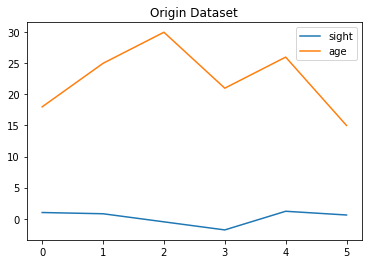

In [37]:
df = pd.DataFrame([[1.0, 18], 
                   [0.8, 25], 
                   [-0.5, 30], 
                   [-1.8, 21], 
                   [1.2, 26], 
                   [0.6, 15]])
df.columns = ["sight", "age"]
df_new = df/df.abs().max()

# 시각화
plt.title("Origin Dataset")
plt.plot(df)
plt.legend(df.columns)

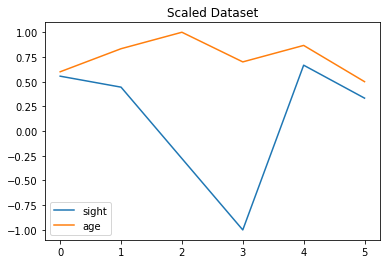

In [38]:
plt.title("Scaled Dataset")
plt.plot(df_new)
plt.legend(df_new.columns)

### RobustScaler()
- 평균과 분산 대신에 중간값과 사분위값을 사용합니다.
- 중간값은 정렬 시 중간에 있는 값을 의미하고
- 사분위값은 1/4, 3/4에 위치한 값을 의미합니다.
- 이상치 영향을 최소화할 수 있습니다.

In [41]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련 데이터의 모수 분포 저장
robust_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = robust_scaler.transform(iris_df)

# 테스트 데이터의 스케일링
# X_test_scaled = robust_scaler.transform(X_test)

# 스케일링된 결과값으로 본래값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)

# transform()시 스케일 변환된 데이터 셋이 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최솟값")
print(iris_df_scaled.min())
print()
print("feature들의 최댓값")
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


### Normalizer()
- 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다.
- 그러나 Normalizer의 경우 각 샘플(행)마다 적용되는 방식입니다.
- 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
- 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
- 모델(특히나 딥러닝) 내 학습 벡터에 적용하며, 
- 특히나 피처들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.

    - 소득 나이 통장개수 잔액 
    - 1000000 50 5 2000
    - 50000000 40 3 3000

In [46]:
from sklearn.preprocessing import Normalizer

# 변형 객체 생성
normal_scaler = Normalizer()

# 훈련 데이터의 모수 분포 저장
normal_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = normal_scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 셋이 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print("feature들의 최솟값")
print(iris_df_scaled.min())
print()
print("feature들의 최댓값")
print(iris_df_scaled.max())

# 테스트 데이터의 스케일링
# X_test_scaled = normal_scaler.transform(X_test)

# 스케일링된 결과값으로 본래값을 구할 수도 있다.
# X_origin = normal_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)    0.653877
sepal width (cm)     0.238392
petal length (cm)    0.167836
petal width (cm)     0.014727
dtype: float64

feature들의 최댓값
sepal length (cm)    0.860939
sepal width (cm)     0.607125
petal length (cm)    0.636981
petal width (cm)     0.280419
dtype: float64


### 로그 스케일링
- 데이터의 분포가 한쪽으로 치우친 경우 사용한다.
- Skew가 심하면 진행한다.
- 시각화를 먼저 진행하고 치우침이 큰 경우 (한쪽으로 쏠림)
- numpy, np.log1p
- ### 구글링을 통해 서칭하기!

### 필수과제
#### 인코딩
- 레이블 인코딩, 원핫 인코딩을 이용해서 타이타닉 데이터를 인코딩해주세요!
- 변수를 인코딩 쉽게 할 수 있는 것만 하는 게 아니라, 전처리를 배웠으니 전처리로 인코딩이 가능한 경우는 인코딩해주세요!

#### 스케일링
- 스케일링은 수치형 드릴 것
- 수치형 데이터의 변수들을 위에 배운 스케일링을 이용해서 실제값의 분포도와 기존의 오리지널 데이터 분포도 확인
- 로그 스케일링도 진행 꼭 해주세요!
- 정규성 검정하는 샤피로 테스트까지 진행해서 실제 통계적으로 변수가 정규성을 띄는지 확인해주세요!
- 구글링해서 진행(Shapiro-Wilks test <= 리서치하기)
- Shapiro에 대해서 리서치하고, 정리해서 요약 발표!